In [2]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

from utils import prepare_cifar10_data, train_model
from models import NFVAE, compute_loss_vae_flow


batch_size = 64
learning_rate = 1e-3
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'runs/NF_VAE')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

nfvae_model = NFVAE(latent_dim=128, flow_length=2).to(device)
optimizer = optim.Adam(nfvae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=nfvae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae_flow,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2303.7665
val Loss: 1773.4862
Epoch 2/20
train Loss: 1730.2637
val Loss: 1940.2520
Epoch 3/20
train Loss: 1686.0885
val Loss: 1624.0271
Epoch 4/20
train Loss: 1627.1494
val Loss: 1585.1283
Epoch 5/20
train Loss: 1564.3830
val Loss: 1563.5497
Epoch 6/20
train Loss: 1541.7780
val Loss: 1528.1724
Epoch 7/20
train Loss: 1528.1736
val Loss: 1520.9211
Epoch 8/20
train Loss: 1542.7648
val Loss: 1546.2422
Epoch 9/20
train Loss: 1519.9474
val Loss: 1502.1025
Epoch 10/20
train Loss: 1534.0865
val Loss: 1587.4556
Epoch 11/20
train Loss: 1509.3322
val Loss: 1485.9144
Epoch 12/20
train Loss: 1613.1958
val Loss: 1585.4560
Epoch 13/20
train Loss: 1617.5581
val Loss: 1548.3479
Epoch 14/20
train Loss: 1518.6719
val Loss: 1518.6217
Epoch 15/20
train Loss: 1578.6737
val Loss: 1555.4242
Epoch 16/20
train Loss: 1648.8860
val Loss: 1565.5446
Epoch 17/20
train Loss: 1581.9269
val Loss: 1614.2444
Epoch 18/20
train Loss: 1571.1361
val Loss: 1529.7145
Epoch 19/20
train Loss: 1662.1354
val

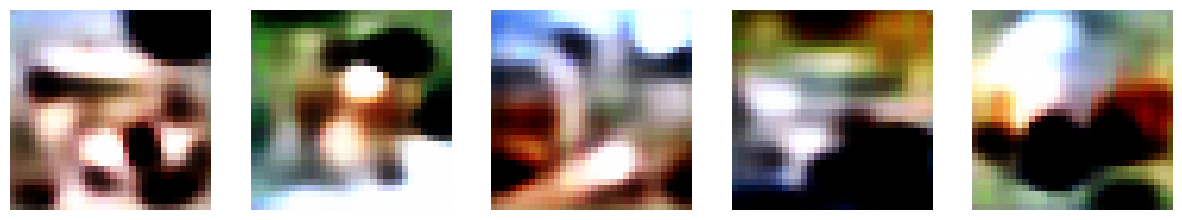

In [5]:
_ = trained_model.generate(device=device)